In [1]:
import pandas as pd

# Cargar dataset balanceado completo
df_final = pd.read_csv('emg_balanceado_final.csv')

# Verificamos su distribución
print(df_final['gb_score'].value_counts())


gb_score
0    15429
3     5143
2     5143
1     5143
Name: count, dtype: int64


In [2]:
# Copiamos el dataset
df_binary = df_final.copy()

# Convertimos los gb_score: 0 se mantiene, 1, 2, 3 se convierten en 1
df_binary['gb_score'] = df_binary['gb_score'].apply(lambda x: 0 if x == 0 else 1)

# Guardamos el dataset binario
df_binary.to_csv('emg_balanced_binary.csv', index=False)

# Verificamos nueva distribución
print(df_binary['gb_score'].value_counts())


gb_score
1    15429
0    15429
Name: count, dtype: int64


In [3]:
# Filtramos eliminando score 0
df_classify = df_final[df_final['gb_score'] != 0].copy()

# Guardamos el dataset de clasificación
df_classify.to_csv('emg_balanced_classify.csv', index=False)

# Verificamos su distribución
print(df_classify['gb_score'].value_counts())


gb_score
3    5143
2    5143
1    5143
Name: count, dtype: int64


/tmp/ipykernel_9294/2123227060.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gb_score', data=df_binary, palette='coolwarm')


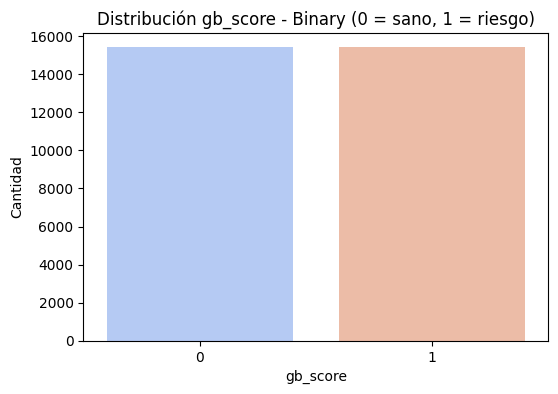

/tmp/ipykernel_9294/2123227060.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gb_score', data=df_classify, palette='viridis')


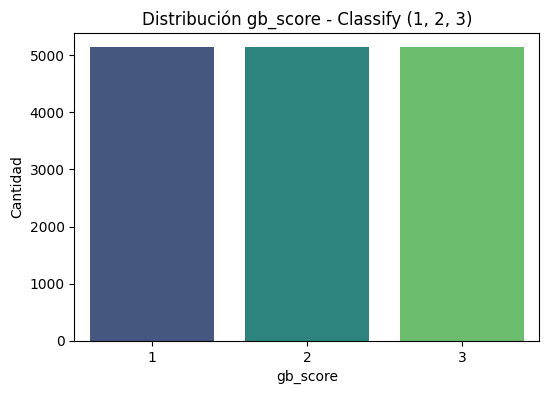

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de distribución para el binario
plt.figure(figsize=(6,4))
sns.countplot(x='gb_score', data=df_binary, palette='coolwarm')
plt.title('Distribución gb_score - Binary (0 = sano, 1 = riesgo)')
plt.xlabel('gb_score')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de distribución para el de clasificación
plt.figure(figsize=(6,4))
sns.countplot(x='gb_score', data=df_classify, palette='viridis')
plt.title('Distribución gb_score - Classify (1, 2, 3)')
plt.xlabel('gb_score')
plt.ylabel('Cantidad')
plt.show()
